In [1]:
import cv2
import numpy as np

# Step 1: Load the image
image = cv2.imread(r'coins.png')

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply thresholding to create a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 4: Remove noise using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Step 5: Identify sure background area using dilation
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Step 6: Identify sure foreground area using distance transform and thresholding
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Step 7: Identify unknown region by subtracting sure_fg from sure_bg
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Step 8: Label markers for the connected components
    _, markers = cv2.connectedComponents(sure_fg)

    # Step 9: Add 1 to all labels so that sure background is not 0 but 1
    markers = markers + 1

    # Step 10: Mark the unknown region with 0
    markers[unknown == 255] = 0

    # Step 11: Apply the Watershed algorithm
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]  # Mark boundaries with red

    # Convert markers to a displayable format (optional step for visualization)
    markers_display = cv2.convertScaleAbs(markers)

    # Step 12: Display results
    cv2.imshow('Original Image', image)
    cv2.imshow('Binary Image', binary)
    cv2.imshow('Markers', markers_display)
    cv2.imshow('Segmented Image', image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


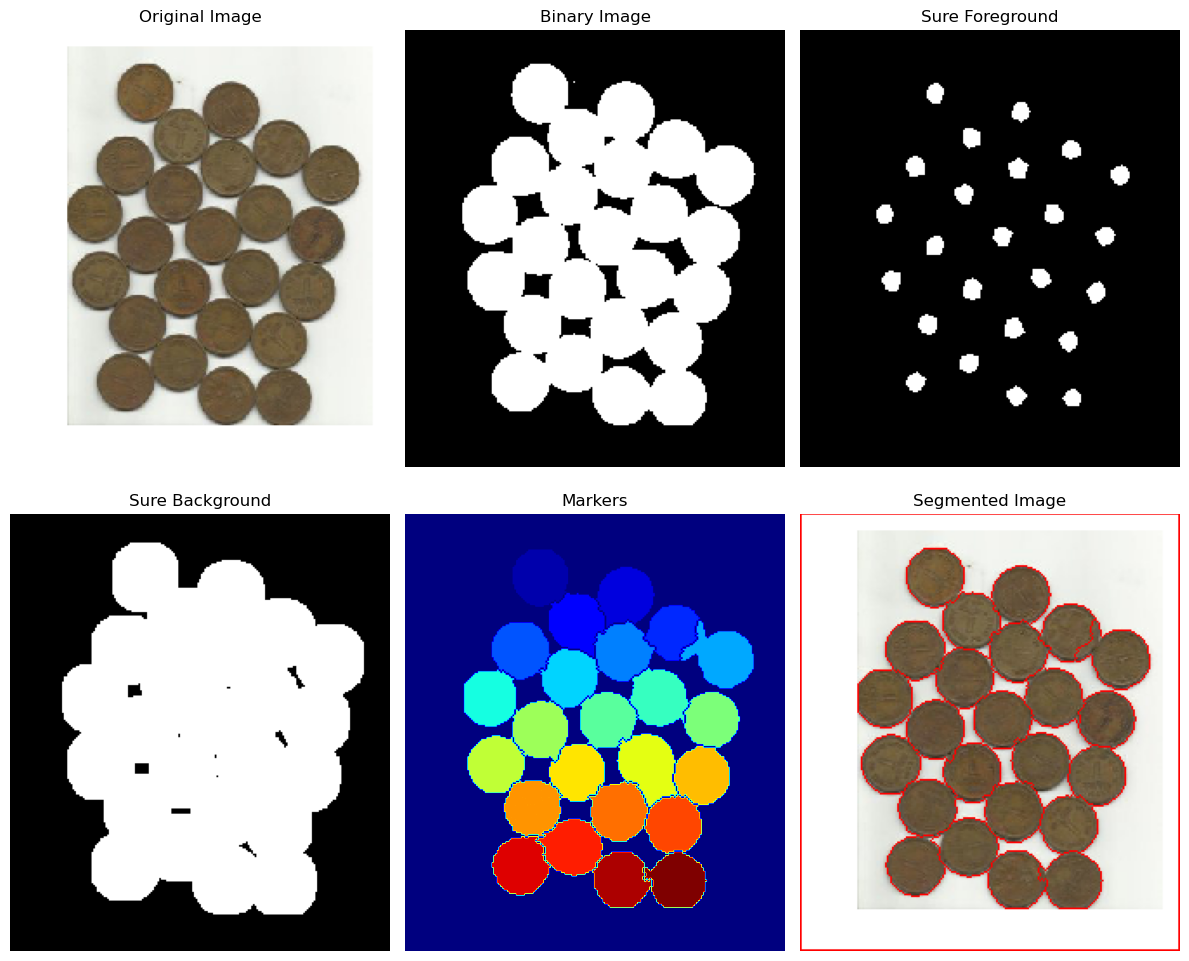

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread(r'coins.png')

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply thresholding to create a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 4: Remove noise using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Step 5: Identify sure background area using dilation
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Step 6: Identify sure foreground area using distance transform and thresholding
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Step 7: Identify unknown region by subtracting sure_fg from sure_bg
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Step 8: Label markers for the connected components
    _, markers = cv2.connectedComponents(sure_fg)

    # Step 9: Add 1 to all labels so that sure background is not 0 but 1
    markers = markers + 1

    # Step 10: Mark the unknown region with 0
    markers[unknown == 255] = 0

    # Step 11: Apply the Watershed algorithm
    markers = cv2.watershed(image, markers)
    segmented_image = image.copy()
    segmented_image[markers == -1] = [0, 0, 255]  # Mark boundaries with red

    # Convert markers to a displayable format (optional step for visualization)
    markers_display = cv2.convertScaleAbs(markers)

    # Step 12: Display results using matplotlib
    plt.figure(figsize=(12, 10))

    # Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Binary Image
    plt.subplot(2, 3, 2)
    plt.imshow(binary, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')

    # Sure Foreground
    plt.subplot(2, 3, 3)
    plt.imshow(sure_fg, cmap='gray')
    plt.title('Sure Foreground')
    plt.axis('off')

    # Sure Background
    plt.subplot(2, 3, 4)
    plt.imshow(sure_bg, cmap='gray')
    plt.title('Sure Background')
    plt.axis('off')

    # Markers
    plt.subplot(2, 3, 5)
    plt.imshow(markers_display, cmap='jet')
    plt.title('Markers')
    plt.axis('off')

    # Segmented Image
    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
